In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df= pd.read_csv('C:\\Users\\LENOVO\\Bengaluru_House_Data.csv')

In [184]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [185]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
12868,Super built-up Area,18-Dec,Channasandra,2 BHK,MVisear,1050,2.0,1.0,44.41
7209,Super built-up Area,Ready To Move,Kumbena Agrahara,2 BHK,Shont F,1180,2.0,2.0,50.00
3418,Plot Area,Ready To Move,Kumaraswami Layout,5 Bedroom,NaN,1270,4.0,1.0,128.00
2841,Built-up Area,Ready To Move,Neeladri Nagar,1 BHK,AdingSV,527,1.0,0.0,26.00
13270,Super built-up Area,Ready To Move,Shivaji Nagar,3 BHK,NaN,1226,2.0,2.0,60.00


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [187]:
df.shape

(13320, 9)

In [188]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [189]:
df1=df.drop(['area_type','balcony','society','availability'],axis=1)

In [190]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [192]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [193]:
df1.shape

(13320, 5)

In [194]:
df1.dropna(inplace=True)

In [195]:
df1.shape

(13246, 5)

In [196]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [197]:
s='10 BHK'
int(s.split(' ')[0])

10

In [198]:
def test(a):
    int(a.split(' ')[0])
test(df1['size'])    

AttributeError: 'Series' object has no attribute 'split'

In [199]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [200]:
df1.drop(['size'],axis=1,inplace = True)

In [201]:
df1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [202]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [203]:
ddd=df1[df1.bhk > 10]
ddd

,location,total_sqft,bath,price,bhk
459,1 Giri Nagar,5000,9.0,360.0,11
1718,2Electronic City Phase II,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,1200,11.0,170.0,11
3379,1Hanuman Nagar,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
3853,1 Annasandrapalya,1200,6.0,150.0,11
4684,Munnekollal,2400,40.0,660.0,43
4916,1Channasandra,1250,15.0,125.0,14
6533,Mysore Road,2232,6.0,300.0,12
7979,1 Immadihalli,6000,12.0,150.0,11


In [204]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [205]:
def is_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [206]:
df1[df1['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [207]:
df1[~df1['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [208]:
s = '1133 - 1384'
l=s.split(' - ')
l

['1133', '1384']

In [209]:
s=((float(l[0]) + float(l[1]))/2)
s

1258.5

In [210]:
def convert_sqft_to_num(x):
    l= x.split(' - ')
    if len(l) == 2:
        return ((float(l[0]) + float(l[1]))/2)
    try:
        return float(x)
    except:
        return None

In [211]:
convert_sqft_to_num('111 - 555')

333.0

In [212]:
df2=df1.copy()

In [213]:
df2['total_sqft']= df2['total_sqft'].apply(convert_sqft_to_num)

In [214]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [215]:
df1.loc[30]

location        Yelahanka
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [216]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


In [217]:
def replacing_nullvalues_total_sqft():
    


IndentationError: expected an indented block (3843352739.py, line 2)

In [218]:
df2[df2['total_sqft']==0]

,location,total_sqft,bath,price,bhk


In [219]:
df2[df2['total_sqft'].isnull()]

,location,total_sqft,bath,price,bhk
410,Kengeri,NaN,1.0,18.50,1
648,Arekere,NaN,9.0,265.00,9
775,Basavanagara,NaN,2.0,93.00,1
872,Singapura Village,NaN,2.0,45.00,2
1019,Marathi Layout,NaN,1.0,110.00,1
1086,Narasapura,NaN,2.0,29.50,2
1400,Chamrajpet,NaN,9.0,296.00,9
1712,Singena Agrahara,NaN,3.0,95.00,3
1743,Hosa Road,NaN,3.0,115.00,3
1821,Sarjapur,NaN,3.0,76.00,3


In [220]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']

In [221]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [222]:
df2['location']=df2['location'].apply(lambda x: str(x))
df2['location']=df2['location'].apply(lambda x: x.strip())

In [223]:
locations =df2.groupby('location')['location'].agg('count')

In [224]:
locations.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [225]:
len(locations[locations<=10])

1052

In [226]:
location_under10 = locations[locations<=10]

In [227]:
df2['location']=df2['location'].apply(lambda x :'Others' if x in location_under10 else x)

In [228]:
locations =df2.groupby('location')['location'].agg('count')

In [229]:
locations.sort_values(ascending=False)

location
Others              2881
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
Kodigehalli           11
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

In [230]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [231]:
df2[df2.total_sqft/df2.bhk<300].shape

(744, 6)

In [232]:
df2[df2.total_sqft/df2.bhk<300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Others,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Others,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,Others,1400.0,7.0,218.0,7,15571.428571
13279,Others,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [233]:
df3 =df2[~(df2.total_sqft/df2.bhk<300)]

In [234]:
df3

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Others,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [235]:
df3.isnull().sum()

location           0
total_sqft        46
bath               0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [236]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1590.189927,2.564790,111.311915,2.650696,6308.502826
std,1260.404795,1.084946,152.089966,0.981698,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


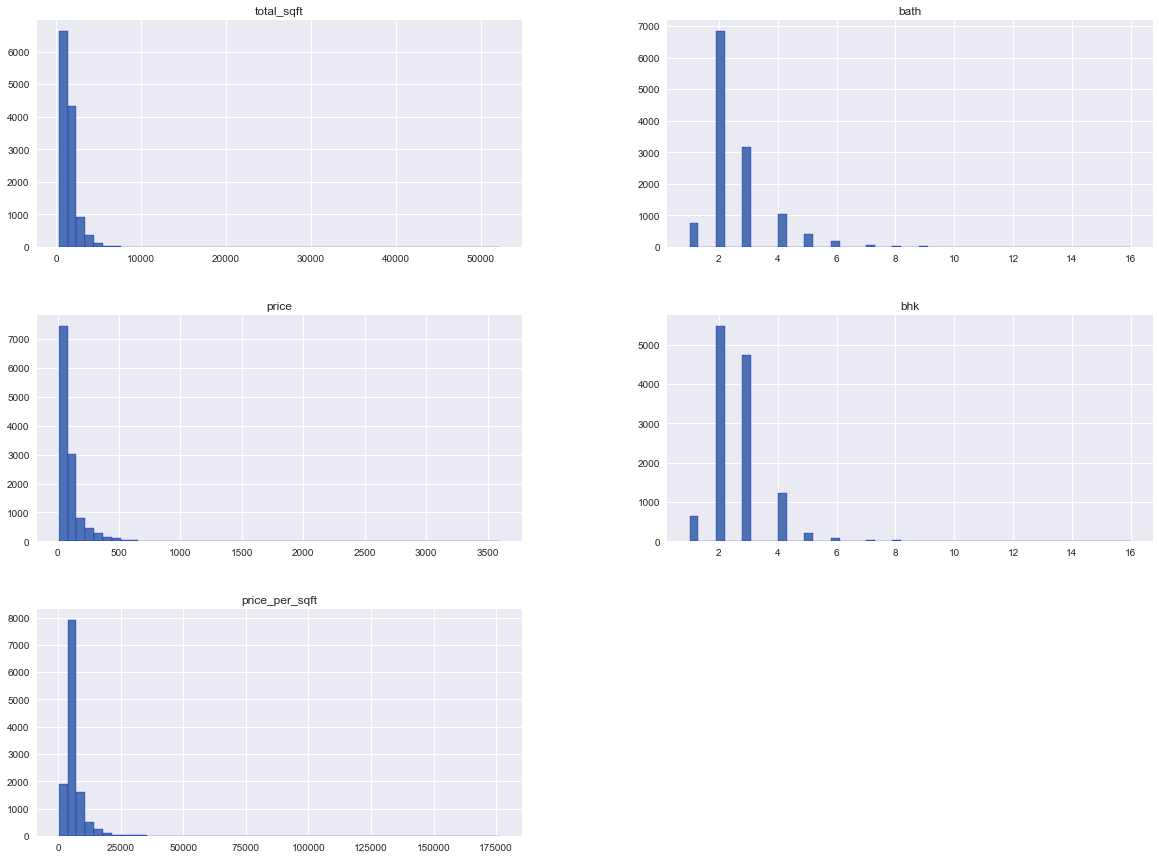

In [237]:
plt.style.use('seaborn')
df3.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [238]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [239]:
for keys,subdf in df3.groupby('location'):
    print(keys)
    print(subdf)

1st Block Jayanagar
                  location  total_sqft  bath  price  bhk  price_per_sqft
210    1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
848    1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2152   1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
2355   1st Block Jayanagar      2400.0   4.0  450.0    4    18750.000000
4991   1st Block Jayanagar      1000.0   3.0   60.0    2     6000.000000
7138   1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
7358   1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668
7383   1st Block Jayanagar      2750.0   4.0  413.0    4    15018.181818
8507   1st Block Jayanagar      1760.0   3.0  115.0    3     6534.090909
10972  1st Block Jayanagar      2450.0   4.0  368.0    4    15020.408163
1st Phase JP Nagar
                 location  total_sqft  bath  price  bhk  price_per_sqft
936    1st Phase JP Nagar      2825.0   4.0  250.0    4     8849.557522
2106   1st Pha

13204  Dasanapura       814.0   2.0   43.70    2     5368.550369
Dasarahalli
          location  total_sqft  bath   price  bhk  price_per_sqft
215    Dasarahalli      1295.0   2.0   65.00    2     5019.305019
1151   Dasarahalli      1520.0   2.0   75.00    3     4934.210526
1479   Dasarahalli      1300.0   2.0   55.00    2     4230.769231
2261   Dasarahalli      1901.0   3.0  119.00    3     6259.863230
4104   Dasarahalli      1150.0   2.0   70.00    2     6086.956522
4340   Dasarahalli      2400.0   3.0  150.00    7     6250.000000
5065   Dasarahalli      2100.0   3.0  120.00    3     5714.285714
5986   Dasarahalli      1300.0   2.0   50.00    2     3846.153846
6562   Dasarahalli      2400.0   2.0  152.00    3     6333.333333
7514   Dasarahalli      1220.0   2.0   52.00    2     4262.295082
7815   Dasarahalli      1375.0   2.0   60.00    2     4363.636364
9401   Dasarahalli      1950.0   3.0  125.00    3     6410.256410
10571  Dasarahalli      1333.0   2.0   86.65    2     6500.375094

12675  Lingadheeranahalli      1768.0   3.0   81.31    3     4598.981900
Magadi Road
          location  total_sqft  bath    price  bhk  price_per_sqft
216    Magadi Road      3600.0   6.0  141.000    6     3916.666667
359    Magadi Road      1116.0   2.0   50.000    2     4480.286738
537    Magadi Road      1282.0   2.0   49.000    3     3822.152886
865    Magadi Road       884.0   2.0   41.100    2     4649.321267
900    Magadi Road      1005.0   2.0   55.780    2     5550.248756
1183   Magadi Road      1000.0   2.0   46.500    2     4650.000000
1985   Magadi Road      1500.0   2.0   93.000    4     6200.000000
2062   Magadi Road      1350.0   1.0  100.000    2     7407.407407
2070   Magadi Road      1322.0   2.0   58.820    3     4449.319213
3267   Magadi Road      1345.0   2.0   55.000    2     4089.219331
4299   Magadi Road       440.0   1.0   35.000    1     7954.545455
4356   Magadi Road      1200.0   4.0  130.000    4    10833.333333
6144   Magadi Road       600.0   1.0   22.00

          location  total_sqft  bath    price  bhk  price_per_sqft
22     Thanisandra      2800.0   5.0  380.000    4    13571.428571
24     Thanisandra       510.0   1.0   25.250    1     4950.980392
94     Thanisandra      1296.0   2.0   80.000    2     6172.839506
117    Thanisandra      1436.0   3.0   74.750    3     5205.431755
120    Thanisandra      1427.0   3.0  120.000    3     8409.250175
...            ...         ...   ...      ...  ...             ...
12792  Thanisandra      1573.0   3.0  100.000    3     6357.279085
12955  Thanisandra      1533.0   3.0   75.885    3     4950.097847
13050  Thanisandra      2259.0   3.0  112.000    4     4957.945994
13251  Thanisandra      1917.0   4.0  130.000    4     6781.429317
13272  Thanisandra      1226.0   2.0   65.590    2     5349.918434

[235 rows x 6 columns]
Thigalarapalya
             location  total_sqft  bath  price  bhk  price_per_sqft
337    Thigalarapalya      3122.0   6.0  230.0    4     7367.072389
876    Thigalarapalya

In [240]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys,subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        s=np.std(subdf.price_per_sqft)
        reduced_df =subdf[(subdf.price_per_sqft>(m-0.4*s))&(subdf.price_per_sqft<(m+0.4*s))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out

In [241]:
len(df3)

12502

In [242]:
df4 = remove_pps_outliers(df3)

In [243]:
df3

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Others,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [244]:
import matplotlib.pyplot as plt

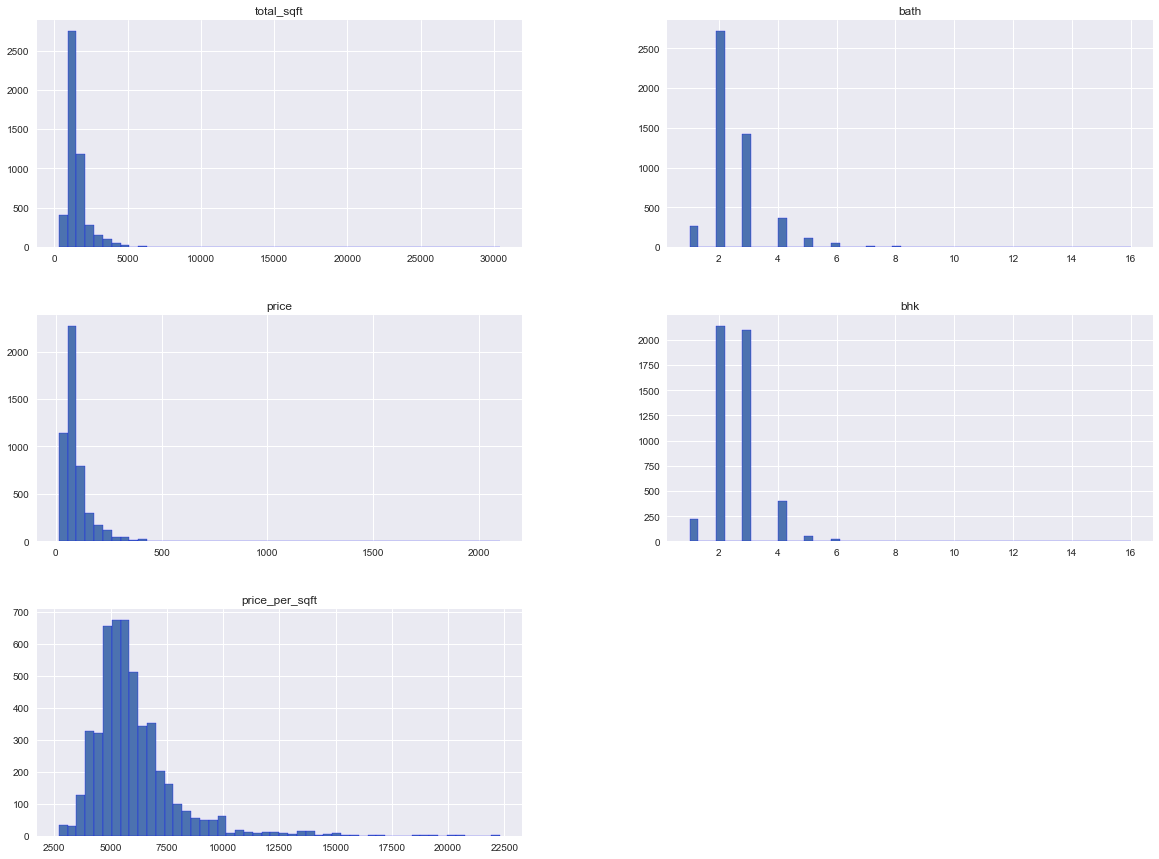

In [245]:
plt.style.use('seaborn')
df4.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [246]:
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
1,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
2,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
3,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
4,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
...,...,...,...,...,...,...
4951,Yeshwanthpur,650.0,1.0,40.0,1,6153.846154
4952,Yeshwanthpur,1500.0,3.0,100.0,3,6666.666667
4953,Yeshwanthpur,1692.0,3.0,108.0,3,6382.978723
4954,Yeshwanthpur,2500.0,5.0,185.0,6,7400.000000


In [247]:
df4.bath.unique()

array([ 3.,  2.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

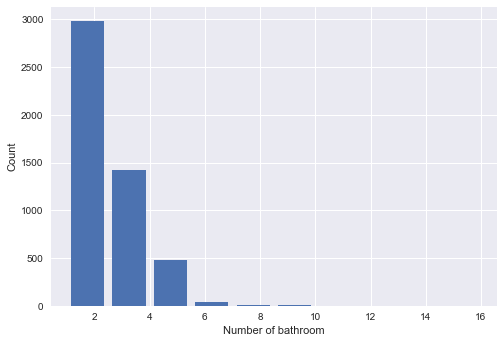

In [248]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel('Number of bathroom')
plt.ylabel('Count')
plt.show()

In [249]:
df5=df4[df4.bath < df4.bhk+2]


In [250]:
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
1,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
2,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
3,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
4,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
...,...,...,...,...,...,...
4951,Yeshwanthpur,650.0,1.0,40.0,1,6153.846154
4952,Yeshwanthpur,1500.0,3.0,100.0,3,6666.666667
4953,Yeshwanthpur,1692.0,3.0,108.0,3,6382.978723
4954,Yeshwanthpur,2500.0,5.0,185.0,6,7400.000000


In [251]:
df5.shape

(4910, 6)

In [252]:
df5.drop(['price_per_sqft'],axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15844\3408336594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(['price_per_sqft'],axis=1,inplace=True)


In [253]:
final=pd.get_dummies(data=df5,columns=['location'],drop_first=True)

In [254]:
final

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,650.0,1.0,40.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4952,1500.0,3.0,100.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4953,1692.0,3.0,108.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4954,2500.0,5.0,185.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [255]:
X=final.drop(['price'],axis=1)
y=final.price

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [258]:
from sklearn.linear_model import LinearRegression

In [259]:
model=LinearRegression()

In [260]:
model.fit(X_train,y_train)

LinearRegression()

In [261]:
model.score(X_test,y_test)

0.9444522721010031

In [262]:
y_pred=model.predict(X_test)

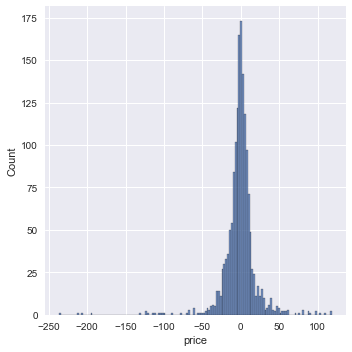

In [263]:
sns.displot(y_test-y_pred)

In [ ]:
score_list1 =[]
score_list2 =[]
def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.4,1.5,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby('location'):
            m= np.mean(subdf.price_per_sqft)
            s=np.std(subdf.price_per_sqft)
            reduced_df =subdf[(subdf.price_per_sqft>(m-i*s))&(subdf.price_per_sqft<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df3)
    
    df5=df4[df4.bath < df4.bhk+2]
    df5.drop(['price_per_sqft'],axis=1,inplace=True)
    final=pd.get_dummies(data=df5,columns=['location'],drop_first=True)
    X=final.drop(['price'],axis=1)
    y=final.price
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


In [ ]:
from sklearn.preprocessing import StandardScaler
score_list1 =[]
score_list2 =[]
def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.92,0.95,0.01):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby('location'):
            m= np.mean(subdf.price_per_sqft)
            s=np.std(subdf.price_per_sqft)
            reduced_df =subdf[(subdf.price_per_sqft>(m-i*s))&(subdf.price_per_sqft<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df3)
    
    df5=df4[df4.bath < df4.bhk+2]
    df5.drop(['price_per_sqft'],axis=1,inplace=True)
    final=pd.get_dummies(data=df5,columns=['location'],drop_first=True)
    X=final.drop(['price'],axis=1)
    y=final.price
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
score_list1 =[]
score_list2 =[]
def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.72,0.75,0.01):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby('location'):
            m= np.mean(subdf.price_per_sqft)
            s=np.std(subdf.price_per_sqft)
            reduced_df =subdf[(subdf.price_per_sqft>(m-i*s))&(subdf.price_per_sqft<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df3)
    
    df5=df4[df4.bath < df4.bhk+2]
    df5.drop(['price_per_sqft'],axis=1,inplace=True)
    final=pd.get_dummies(data=df5,columns=['location'],drop_first=True)
    X=final.drop(['price'],axis=1)
    y=final.price
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   
